**Logistic Regression**

In [97]:
#imported libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

df= pd.read_csv("drive/MyDrive/final_preproccessed_dataset.csv")

In [98]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nClass distribution:")
print(df['stroke'].value_counts())
print("\nPercentage distribution:")
print(df['stroke'].value_counts(normalize=True) * 100)

Dataset shape: (5109, 9)

First 5 rows:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.527491  1.785456  0.487057 -0.059768  0.682283  0.403202  0.441984   
1  1.529499  1.702621 -0.414959  0.120178 -1.055948 -0.430800 -0.307385   
2  1.507356 -0.535913 -0.754396  0.485017  0.245834 -0.631294  0.622392   
3  1.317592  0.815897  0.591874  0.167914  0.538382  0.651559 -0.482390   
4  1.551234  1.248943 -1.437634  0.091349 -0.956765 -0.469713 -0.282508   

        PC8  stroke  
0 -0.138162       1  
1 -0.027640       1  
2 -0.384945       1  
3  0.738788       1  
4 -0.120963       1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     5109 non-null   float64
 1   PC2     5109 non-null   float64
 2   PC3     5109 non-null   float64
 3   PC4     5109 non-null   float64
 4   PC5     5109 non-null   float

In [99]:
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4087, 8)
Shape of X_test: (1022, 8)
Shape of y_train: (4087,)
Shape of y_test: (1022,)


In [100]:
smote = SMOTE(sampling_strategy=0.55, random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and fit the scaler on the original training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Scale the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of X_train after SMOTE:", X_train_resampled.shape)
print("\nValue counts of y_train before SMOTE:\n", y_train.value_counts())
print("\nValue counts of y_train after SMOTE:\n", y_train_resampled.value_counts())

unique, counts = np.unique(y_test, return_counts=True)
print("Test Set:", dict(zip(unique, counts)))

Shape of X_train before SMOTE: (4087, 8)
Shape of X_train after SMOTE: (6026, 8)

Value counts of y_train before SMOTE:
 stroke
0    3888
1     199
Name: count, dtype: int64

Value counts of y_train after SMOTE:
 stroke
0    3888
1    2138
Name: count, dtype: int64
Test Set: {np.int64(0): np.int64(972), np.int64(1): np.int64(50)}


Variant 1 - Basic LR model

In [101]:
logreg_basic = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',
    C=1.0,          # default regularization
    penalty='l2',
    solver='liblinear'
)

#train the model using the SMOTEd data
logreg_basic.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

In [102]:
#make predictions using the test data
y_pred_basic = logreg_basic.predict(X_test_scaled)
y_pred_proba_basic = logreg_basic.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [103]:
#performance metrics
accuracy_basic = accuracy_score(y_test, y_pred_basic)
precision_basic = precision_score(y_test, y_pred_basic)
recall_basic = recall_score(y_test, y_pred_basic)
f1_basic = f1_score(y_test, y_pred_basic)
auc_basic = roc_auc_score(y_test, y_pred_basic)

print(f"\nPerformance Metrics:")
print(f"Accuracy: {accuracy_basic:.4f}")
print(f"Precision: {precision_basic:.4f}")
print(f"Recall: {recall_basic:.4f}")
print(f"F1-Score: {f1_basic:.4f}")
print(f"AUC-ROC: {auc_basic:.4f}")


Performance Metrics:
Accuracy: 0.8532
Precision: 0.1914
Recall: 0.6200
F1-Score: 0.2925
AUC-ROC: 0.7426


In [104]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_basic, target_names=['No Stroke', 'Stroke']))


Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.98      0.87      0.92       972
      Stroke       0.19      0.62      0.29        50

    accuracy                           0.85      1022
   macro avg       0.58      0.74      0.61      1022
weighted avg       0.94      0.85      0.89      1022



In [105]:
# Perform cross-validation on the best model using the resampled training data
# Using f1 score as the scoring metric
cv_scores = cross_val_score(logreg_basic, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

print("Cross-validation F1 scores for each fold:", cv_scores)
print("Mean cross-validation F1 score:", cv_scores.mean())

Cross-validation F1 scores for each fold: [0.68839885 0.71805274 0.71871872 0.72040816 0.72689938]
Mean cross-validation F1 score: 0.7144955707553973


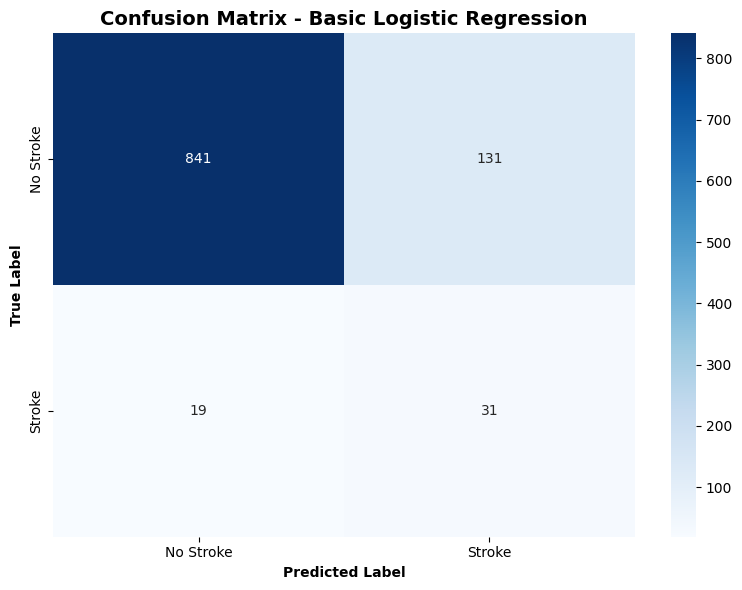

True Negatives: 841
False Positives: 131
False Negatives: 19
True Positives: 31


In [106]:
#confusion matrix
cm_basic = confusion_matrix(y_test, y_pred_basic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix - Basic Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.show()

# Print confusion matrix values
tn_basic, fp_basic, fn_basic, tp_basic = cm_basic.ravel()
print(f"True Negatives: {tn_basic}")
print(f"False Positives: {fp_basic}")
print(f"False Negatives: {fn_basic}")
print(f"True Positives: {tp_basic}")

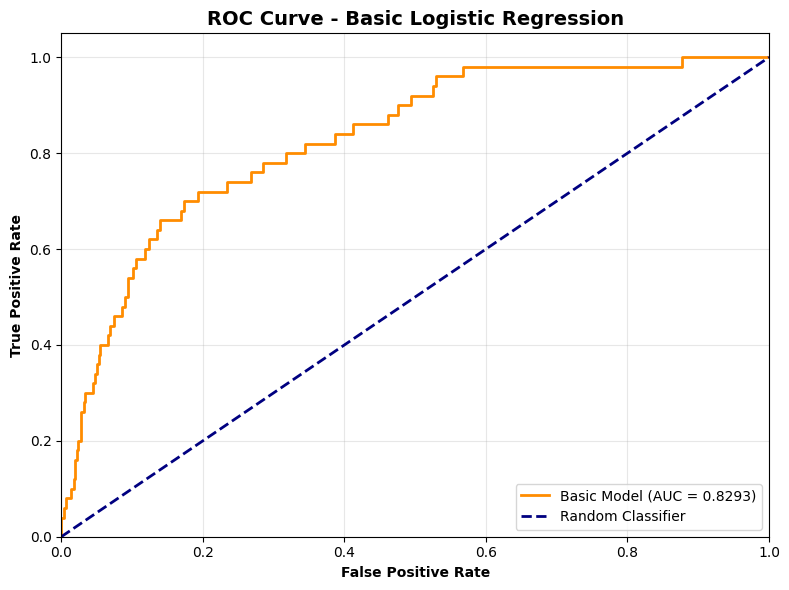

In [107]:
#ROC curve for the basic model
fpr_basic, tpr_basic, thresholds_basic = roc_curve(y_test, y_pred_proba_basic)
auc_basic = roc_auc_score(y_test, y_pred_proba_basic)

plt.figure(figsize=(8, 6))
plt.plot(fpr_basic, tpr_basic, color='darkorange', lw=2,
         label=f'Basic Model (AUC = {auc_basic:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC Curve - Basic Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Variant 2 - stronger regularization

In [108]:
logreg_regularized = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',
    C=0.1,          # stronger regularization
    penalty='l2',
    solver='liblinear'
)
logreg_regularized.fit(X_train_resampled, y_train_resampled)


LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [109]:

y_pred_reg = logreg_regularized.predict(X_test_scaled)
y_pred_proba_reg = logreg_regularized.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [110]:
# Make predictions with the best model
print("REGULARIZED LOGISTIC REGRESSION - PERFORMANCE METRICS")


accuracy_reg = accuracy_score(y_test, y_pred_reg)
f1_reg = f1_score(y_test, y_pred_reg, average='binary')
precision_reg = precision_score(y_test, y_pred_reg, average='binary')
recall_reg = recall_score(y_test, y_pred_reg, average='binary')
auc_reg = roc_auc_score(y_test, y_pred_proba_reg)

print(f"Accuracy: {accuracy_reg:.4f}")
print(f"F1 Score: {f1_reg:.4f}")
print(f"Precision: {precision_reg:.4f}")
print(f"Recall: {recall_reg:.4f}")
print(f"AUC-ROC: {auc_reg:.4f}")

REGULARIZED LOGISTIC REGRESSION - PERFORMANCE METRICS
Accuracy: 0.8523
F1 Score: 0.2911
Precision: 0.1902
Recall: 0.6200
AUC-ROC: 0.8300


In [111]:
# Perform cross-validation on the best model using the resampled training data
# Using f1 score as the scoring metric
cv_scores_reg = cross_val_score(logreg_regularized, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

print("Cross-validation F1 scores for each fold:", cv_scores)
print("Mean cross-validation F1 score:", cv_scores.mean())

Cross-validation F1 scores for each fold: [0.68839885 0.71805274 0.71871872 0.72040816 0.72689938]
Mean cross-validation F1 score: 0.7144955707553973



Confusion Matrix (Regularized Model):
[[840 132]
 [ 19  31]]


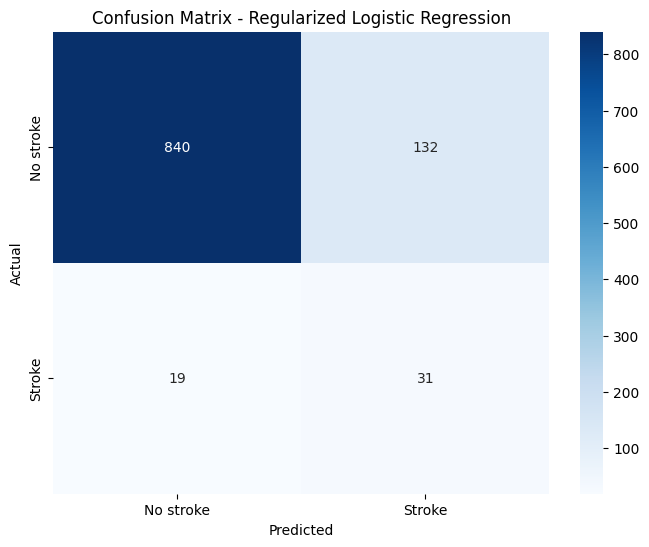

In [112]:
# Confusion Matrix for the regularized model
cm_regularized = confusion_matrix(y_test, y_pred_reg)
print(f"\nConfusion Matrix (Regularized Model):")
print(cm_regularized)

# Plot confusion matrix for the regularized model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_regularized, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No stroke', 'Stroke'],
            yticklabels=['No stroke', 'Stroke'])
plt.title('Confusion Matrix - Regularized Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

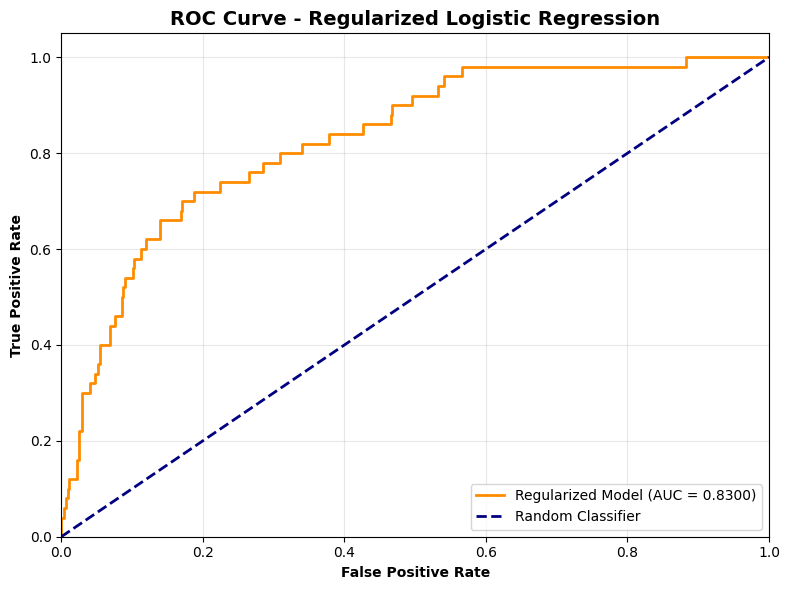

In [113]:
# ROC curve for the regularized model
fpr_reg, tpr_reg, thresholds_reg = roc_curve(y_test, y_pred_proba_reg)
auc_reg = roc_auc_score(y_test, y_pred_proba_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_reg, tpr_reg, color='darkorange', lw=2,
         label=f'Regularized Model (AUC = {auc_reg:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC Curve - Regularized Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [114]:
print(f"CLASSIFICATION REPORT - Regularized Logistic regression")
print(classification_report(y_test, y_pred_reg, target_names=['No stroke', 'stroke']))

CLASSIFICATION REPORT - Regularized Logistic regression
              precision    recall  f1-score   support

   No stroke       0.98      0.86      0.92       972
      stroke       0.19      0.62      0.29        50

    accuracy                           0.85      1022
   macro avg       0.58      0.74      0.60      1022
weighted avg       0.94      0.85      0.89      1022



Model Variant 3 - GridSearchCV tuned

In [115]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'), param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation F1 score: ", grid_search.best_score_)

# Get the best model
best_logreg = grid_search.best_estimator_

Best parameters found:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation F1 score:  0.7165668897218578


In [116]:
# Make predictions with the best model
y_pred_tuned = best_logreg.predict(X_test)
y_pred_proba_tuned = best_logreg.predict_proba(X_test)[:, 1]

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"\nPerformance Metrics (Tuned Model):")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-Score: {f1_tuned:.4f}")
print(f"AUC-ROC: {auc_tuned:.4f}")


Performance Metrics (Tuned Model):
Accuracy: 0.7114
Precision: 0.1254
Recall: 0.8200
F1-Score: 0.2175
AUC-ROC: 0.8380



Confusion Matrix (Tuned Model):
[[686 286]
 [  9  41]]


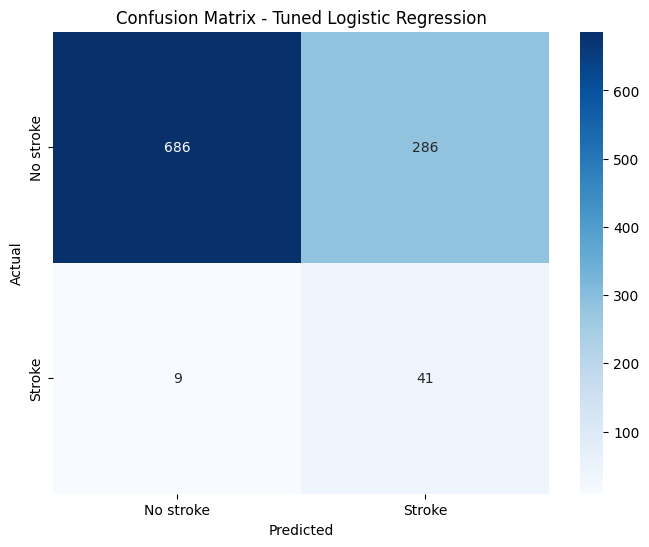

In [117]:
# Confusion Matrix for the tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(f"\nConfusion Matrix (Tuned Model):")
print(cm_tuned)

# Plot confusion matrix for the tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No stroke', 'Stroke'],
            yticklabels=['No stroke', 'Stroke'])
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

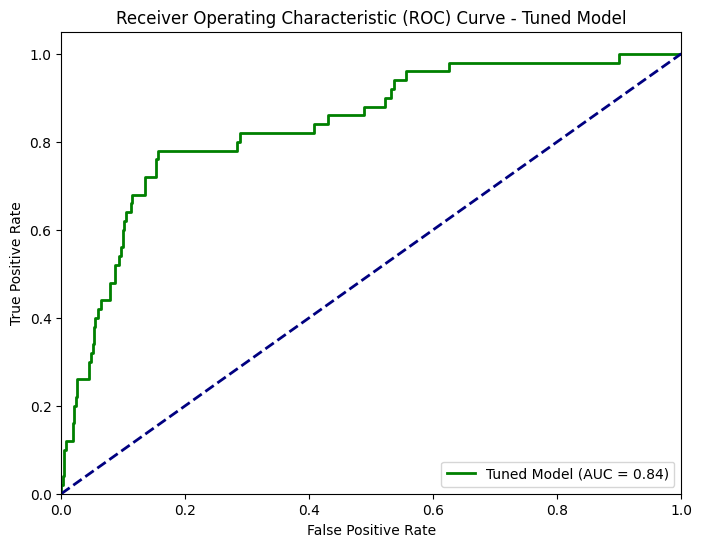

In [118]:
# Calculate ROC curve for the tuned model
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_pred_proba_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot ROC curve for the tuned model
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='green', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Model')
plt.legend(loc="lower right")
plt.show()

In [119]:
# Perform cross-validation on the best model using the resampled training data
# Using f1 score as the scoring metric
cv_scores_tuned = cross_val_score(best_logreg, X_train_resampled, y_train_resampled, cv=5, scoring='f1')

print("Cross-validation F1 scores for each fold:", cv_scores)
print("Mean cross-validation F1 score:", cv_scores.mean())

Cross-validation F1 scores for each fold: [0.68839885 0.71805274 0.71871872 0.72040816 0.72689938]
Mean cross-validation F1 score: 0.7144955707553973


In [120]:
# Classification Report for the tuned model
print(f"CLASSIFICATION REPORT - Tuned Logistic Regression")
print(classification_report(y_test, y_pred_tuned, target_names=['No stroke', 'stroke']))

CLASSIFICATION REPORT - Tuned Logistic Regression
              precision    recall  f1-score   support

   No stroke       0.99      0.71      0.82       972
      stroke       0.13      0.82      0.22        50

    accuracy                           0.71      1022
   macro avg       0.56      0.76      0.52      1022
weighted avg       0.94      0.71      0.79      1022



**Comparison**

In [121]:
comparison_data = {
    'Model': ['Basic Logistic Regression', 'GridSreachCV tuned','Hyperparameter-Tuned regularized'],
    'Accuracy': [accuracy_basic, accuracy_tuned, accuracy_reg],
    'Precision': [precision_basic, precision_tuned, precision_reg],
    'Recall': [recall_basic, recall_tuned, recall_reg],
    'F1-Score': [f1_basic, f1_tuned, f1_reg],
    'AUC-ROC': [auc_basic, auc_tuned, auc_reg],
    'CV_Accuracy': [cv_scores.mean(), cv_scores_reg.mean(), cv_scores_tuned.mean()],
    'CV_Std': [cv_scores.std(), cv_scores_reg.std(), cv_scores_tuned.std()]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nPerformance Comparison Across All Varieties:")
print(comparison_df.round(4))

# Find best model based on F1-Score
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_f1 = comparison_df.loc[best_model_idx, 'F1-Score']

print(f"\nBest Model: {best_model} (F1-Score: {best_f1:.4f})")


Performance Comparison Across All Varieties:
                              Model  Accuracy  Precision  Recall  F1-Score  \
0         Basic Logistic Regression    0.8532     0.1914    0.62    0.2925   
1                GridSreachCV tuned    0.7114     0.1254    0.82    0.2175   
2  Hyperparameter-Tuned regularized    0.8523     0.1902    0.62    0.2911   

   AUC-ROC  CV_Accuracy  CV_Std  
0   0.8293       0.7145  0.0134  
1   0.8380       0.7142  0.0148  
2   0.8300       0.7166  0.0122  

Best Model: Basic Logistic Regression (F1-Score: 0.2925)


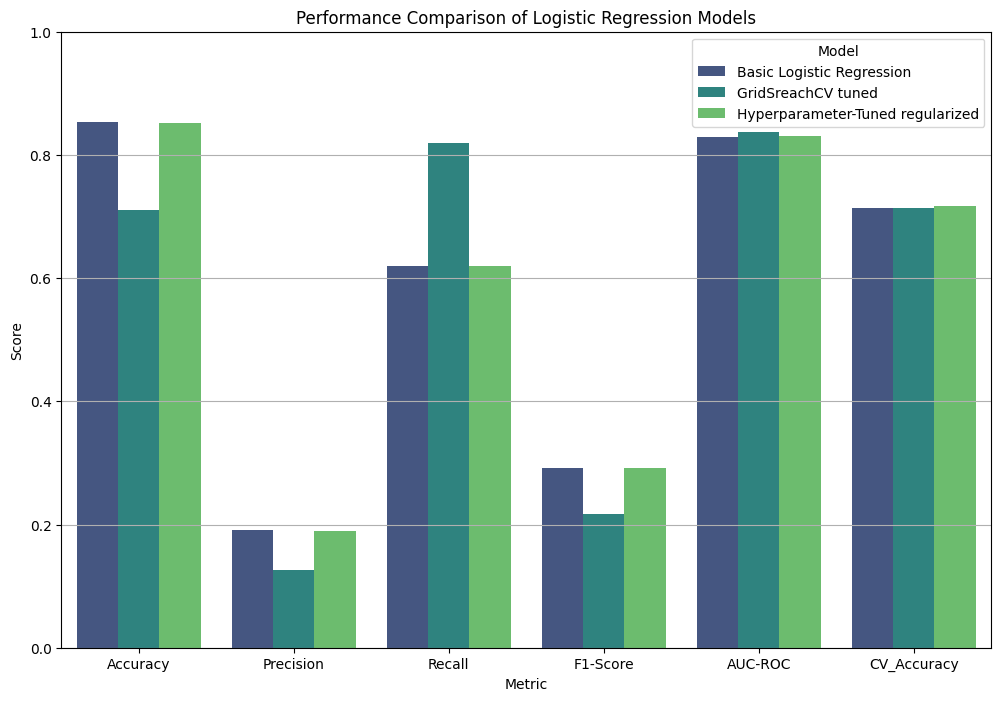

In [122]:
comparison_melted = comparison_df.melt(
    'Model',
    var_name='Metric',
    value_name='Score',
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'CV_Accuracy']
)

plt.figure(figsize=(12, 8))
sns.barplot(x='Metric',
            y='Score',
            hue='Model',
            data=comparison_melted,
            palette='viridis')
plt.title('Performance Comparison of Logistic Regression Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()